# 1. 準備: モジュールのインポート

In [6]:
import numpy as np
import glob
import json
from opensignalsreader import OpenSignalsReader
import anaECG
import anaPulse

# 2. 準備
## 2-1. 心電図の分析をする関数

In [7]:
def func_ana_ecg(t, x):
    Fs = 1/np.mean(np.diff(t))
    tR = anaECG.func_detect_R(x, t, 1)
    mRRI, sRRI = anaECG.func_RRI_stat(tR, 1, fname)
    SD1,SD2 = anaECG.funcPP(tR, 1, fname)
    tref,RRIT = anaECG.funcRRIT(t, x, 2.5, 0)
    LF,HF,nLF,nHF = anaECG.funcLFHF(tref, RRIT, 0, fname)

## 2-2. 脈拍の分析をする関数

In [8]:
def func_ana_bvp(t, x):
    Fs = 1/np.mean(np.diff(t))
    #tPeak = anaPulse.func_detect_peak(x, t, 1)

# 3. データファイルの読込

In [9]:
def func_anaopensignals(fname):
    acq = OpenSignalsReader(fname, show=False)
    dat = acq.signal()
    with open(fname) as f:
        txtmeta=f.readlines()[1]
    jsonmeta=json.loads(txtmeta[1:])
    Binalino_ID=txtmeta[4:21]
    Fs = int(jsonmeta[Binalino_ID]['sampling rate'])
    dt = 1/Fs
    for sensType in dat.keys():
        tmp = dat[sensType]
        nd = len(tmp)
        t = np.linspace(dt,dt*nd,nd)
        x = tmp.reshape(nd,1)
        exfname='{}_{}'.format(fname[:-4],sensType)
        print(fname[2:-4])
        if sensType=='ECG':
            func_ana_ecg(t,tmp)
        elif sensType=='RAW':
            func_ana_bvp(t,tmp)

# 4. 処理の開始

opensignals_sample_ECG


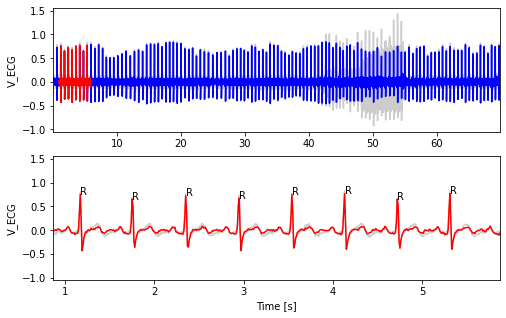

opensignals_sample_ECG


<Figure size 432x288 with 0 Axes>

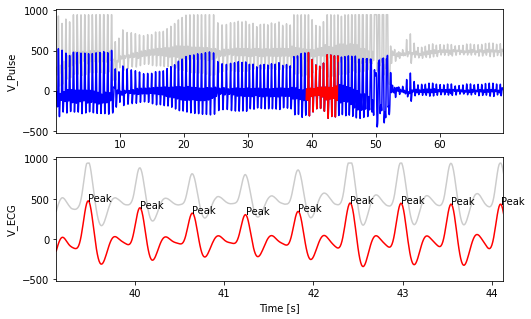

<Figure size 432x288 with 0 Axes>

In [10]:
files = glob.glob("./opensignals_*.txt")
for fname in files:
    func_anaopensignals(fname)